Actividad 6 unidad 2 de redes neuronales profundas:

Redes neuronales completamente conectadas aplicadas en Fashion MNIST reconocimiento de prendas de vestir 


In [2]:
import keras

fmnist=keras.datasets.fashion_mnist

(training_images,training_labels),(test_images,test_labels)=fmnist.load_data()



Label: 0
Image:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  

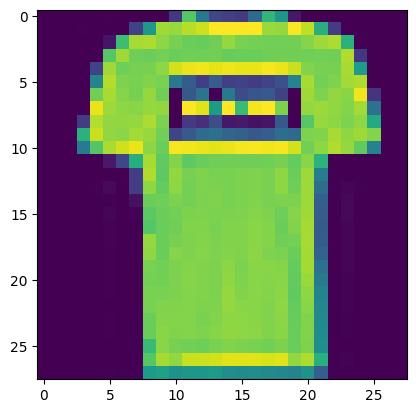

In [3]:
import numpy as np
import matplotlib.pyplot as plt 


index=1

np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')

plt.imshow(training_images[index])
      

In [4]:
#normalizacion de los datos:

training_images=training_images/255.0
test_images=test_images/255.0



In [5]:
model=keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                               keras.layers.Dense(128,activation='relu'),
                               keras.layers.Dense(10,activation='softmax')])

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history=model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7840 - loss: 0.6350
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8617 - loss: 0.3871
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3461
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8820 - loss: 0.3172
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8891 - loss: 0.2980
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8970 - loss: 0.2765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9017 - loss: 0.2677
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9044 - loss: 0.2534
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9078 - loss: 0.2462
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9115 - loss: 0.2355


<Axes: >

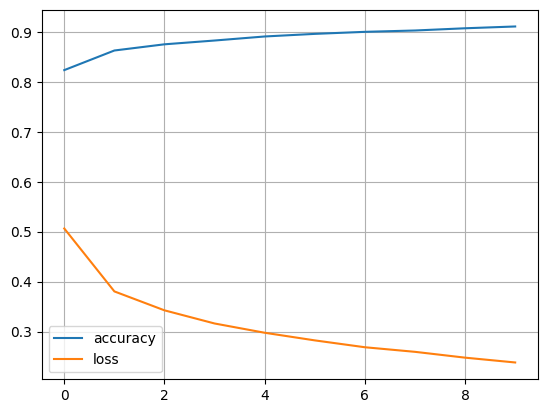

In [8]:
import pandas as pd 


pd.DataFrame(history.history).plot(grid=True)

In [9]:
#evaluacion del modelo 

loss,accuracy=model.evaluate(training_images,training_labels)
print('Perdida en el conjunto de entrenamiento:', loss)
print('Precision en el conjunto de entrenamiento:', accuracy)


loss,accuracy=model.evaluate(test_images,test_labels)
print('Perdida en el conjunto de prueba:', loss)
print('Precision en el conjunto de prueva:', accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.9111 - loss: 0.2387
Perdida en el conjunto de entrenamiento: 0.2409209907054901
Precision en el conjunto de entrenamiento: 0.9110999703407288
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.8744 - loss: 0.3592
Perdida en el conjunto de prueba: 0.35670462250709534
Precision en el conjunto de prueva: 0.8730000257492065


In [10]:
#prediccion:

index=1
print(f'Label: {test_labels[index]}')
classification=model.predict(test_images[index:index+1])
print(f'Classification: {classification.reshape(-1,1)}')

Label: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Classification: [[7.1875925e-06]
 [4.7800451e-11]
 [9.9990714e-01]
 [1.8182879e-15]
 [8.4263433e-05]
 [6.4358431e-13]
 [1.4521157e-06]
 [1.7802404e-19]
 [3.7098931e-12]
 [1.7408216e-17]]
